In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Plot the meter_reading part of different buildings by site_ids

In [3]:
train = pd.read_csv('/Users/cjq/Documents/kaggle/ashrae-energy-prediction/train.csv')
building = pd.read_csv('/Users/cjq/Documents/kaggle/ashrae-energy-prediction/building_metadata.csv')
train = train.merge(building, on='building_id', how='left')


In [4]:
train['timestamp'] = pd.to_datetime(train['timestamp'] )

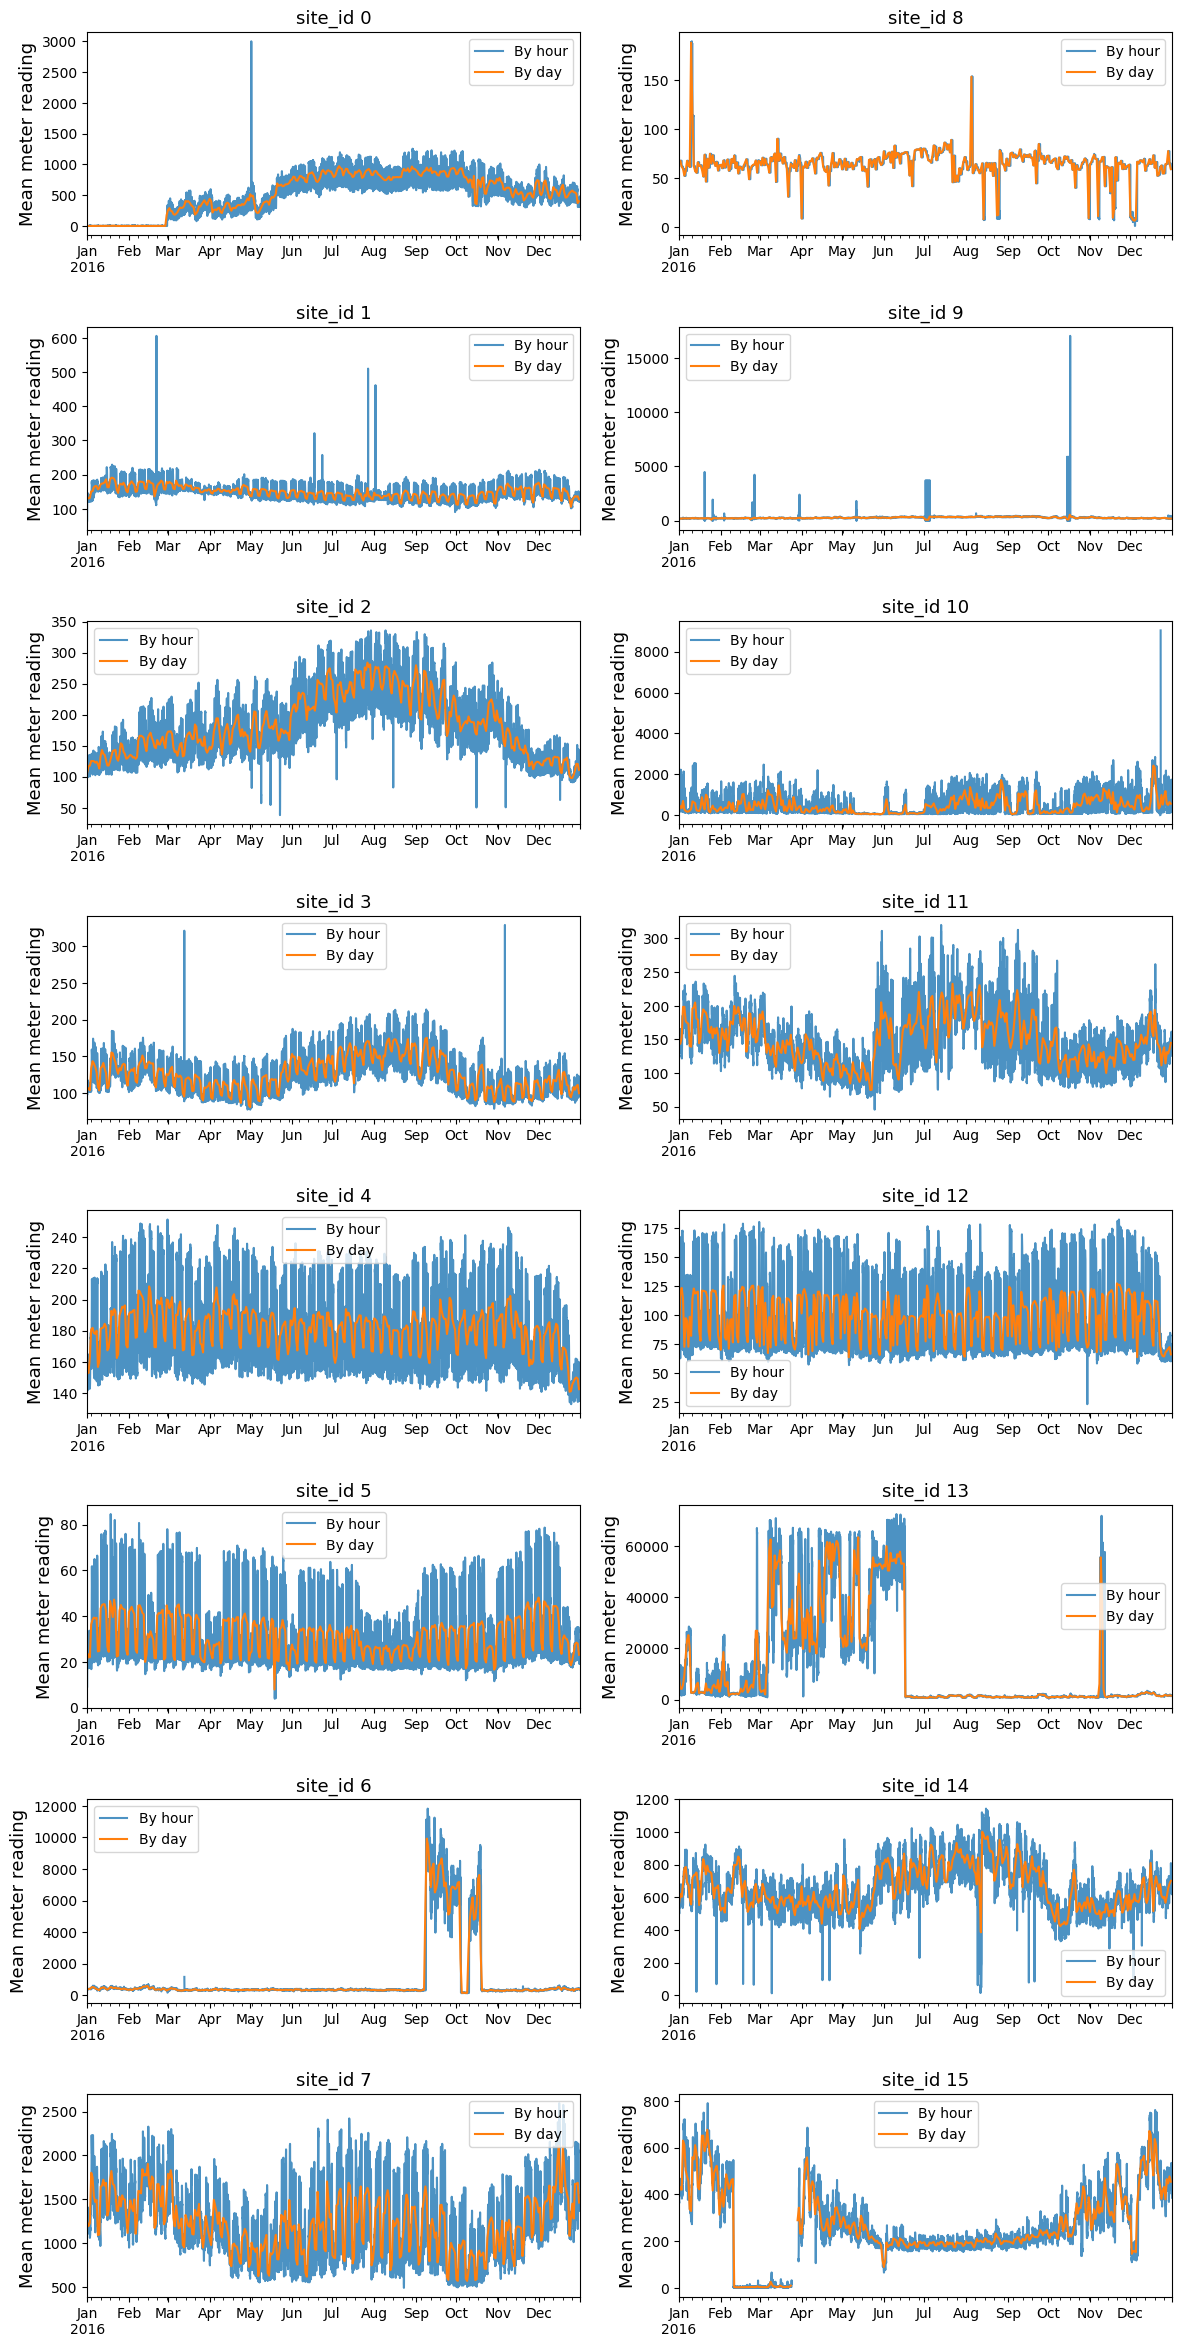

In [5]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i in range(train['site_id'].nunique()):
    train[train['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
    train[train['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    plt.subplots_adjust(hspace=0.45)